In [13]:
from influxdb import InfluxDBClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
client = InfluxDBClient(host = 'influxus.itu.dk', port = 8086, username = 'lsda', password = 'icanonlyread')
client.switch_database('orkney')

In [5]:
client.get_list_measurements()

[{'name': 'ANM_Operation'},
 {'name': 'Demand'},
 {'name': 'Generation'},
 {'name': 'Generator_Site_Issues'},
 {'name': 'SHEPD_Equipment'},
 {'name': 'Temperature'},
 {'name': 'Wind'}]

In [18]:
results = client.query('SELECT * FROM "Demand" where time > now() - 3w ORDER BY time')
points = results.get_points()
values = results.raw['series'][0]["values"]
columns = results.raw['series'][0]["columns"]
demand_df = pd.DataFrame(values, columns = columns).set_index("time")

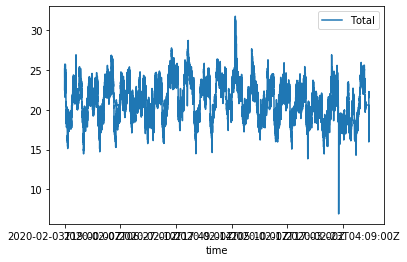

In [19]:
demand_df.plot()

In [20]:
results = client.query('SELECT * FROM "Generation" where time > now() - 3w ORDER BY time')
points = results.get_points()
values = results.raw['series'][0]["values"]
columns = results.raw['series'][0]["columns"]
generation_df = pd.DataFrame(values, columns = columns).set_index("time")

In [21]:
generation_df.head()

,ANM,Non-ANM,Total
time,,,
2020-02-03T19:00:00Z,12.360001,5.035,17.395001
2020-02-03T19:01:00Z,13.557999,5.347,18.904999
2020-02-03T19:02:00Z,12.915000,4.574,17.489000
2020-02-03T19:03:00Z,10.609000,3.836,14.445000
2020-02-03T19:04:00Z,12.536853,3.613,16.149853


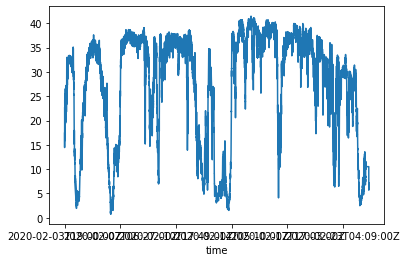

In [25]:
generation_df['Total'].plot()

In [26]:
results = client.query('SELECT * FROM "Temperature" where time > now() - 3w ORDER BY time')
points = results.get_points()
values = results.raw['series'][0]["values"]
columns = results.raw['series'][0]["columns"]
temperature_df = pd.DataFrame(values, columns = columns).set_index("time")

In [27]:
temperature_df.head()

,Celsius,latitude,longitude
time,,,
2020-02-03T21:00:00Z,7.864709,59,356.75
2020-02-04T00:00:00Z,7.846277,59,356.75
2020-02-04T03:00:00Z,7.854883,59,356.75
2020-02-04T06:00:00Z,7.601282,59,356.75
2020-02-04T09:00:00Z,7.507898,59,356.75


In [28]:
results = client.query('SELECT * FROM "Wind" where time > now() - 3w ORDER BY time')
points = results.get_points()
values = results.raw['series'][0]["values"]
columns = results.raw['series'][0]["columns"]
wind_df = pd.DataFrame(values, columns = columns).set_index("time")

In [29]:
wind_df.head()

,M/S,height,latitude,longitude,u,v
time,,,,,,
2020-02-03T21:00:00Z,22.344075,10.0,59,356.75,22.294544,1.486936
2020-02-03T21:00:00Z,26.071696,80.0,59,356.75,26.045889,1.159734
2020-02-04T00:00:00Z,9.621333,10.0,59,356.75,1.649443,-9.478891
2020-02-04T00:00:00Z,11.310281,80.0,59,356.75,1.662510,-11.187427
2020-02-04T03:00:00Z,13.995145,10.0,59,356.75,-0.550066,-13.984331


In [30]:
results = client.query('SELECT * FROM "ANM_Operation" where time > now() - 3w ORDER BY time')
points = results.get_points()
values = results.raw['series'][0]["values"]
columns = results.raw['series'][0]["columns"]
anm_df = pd.DataFrame(values, columns = columns).set_index("time")

In [31]:
anm_df.head()

,Core Zone,Zone 1,Zone 1A,Zone 2,Zone 2A,Zone 2B,Zone 3,Zone 4,Zone 4A
time,,,,,,,,,
2020-02-03T19:03:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03T19:04:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03T19:05:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03T19:06:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03T19:07:00Z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
